<a href="https://colab.research.google.com/github/GBAlvim/callback_return_rate_analysis/blob/main/callback_return_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise e Tratamento de dados para extração de informações para decisão.

## Importação de bibliotecas

In [14]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Leitura e vizualização do arquivo

In [15]:
file_path = "/content/retorno_pernambucanas20240702 (2).csv"
df = pd.read_csv(file_path)
df

,lcall\tID\tName\tDoc\tFone\tFone_Tipo\tClasse\tStatus_Ligacao\tDuaration\tFinalizacao_Operador\tISDN\tLastCall\tQtdCall
0,01/07/2024 12:59\t17.198.495.812.272.800\tNULL...
1,01/07/2024 12:59\t17.198.496.032.275.200\tNULL...
2,01/07/2024 12:59\t17.198.495.992.274.800\tCARL...
3,01/07/2024 12:59\t27313298\tGIOVANE CARDOSO DE...
4,01/07/2024 12:59\t27316150\tCAROLINA GONCALVES...
5,01/07/2024 12:59\t17.198.495.992.274.800\tNULL...
6,01/07/2024 12:59\t17.198.496.022.275.100\tJULI...
7,01/07/2024 12:59\t27311444\tALINE SANTOS DE AL...
8,01/07/2024 12:59\t17.198.496.022.275.100\tNULL...
9,01/07/2024 12:59\t17.198.496.022.275.200\tMANO...


## Vizualição das colunas

In [17]:
print(df.columns)  # Lista todas as colunas disponíveis


Index(['lcall', 'ID', 'Name', 'Doc', 'Fone', 'Fone_Tipo', 'Classe',
       'Status_Ligacao', 'Duaration', 'Finalizacao_Operador', 'ISDN',
       'LastCall', 'QtdCall'],
      dtype='object')


## Plot da distribuição das ligações por "Status"

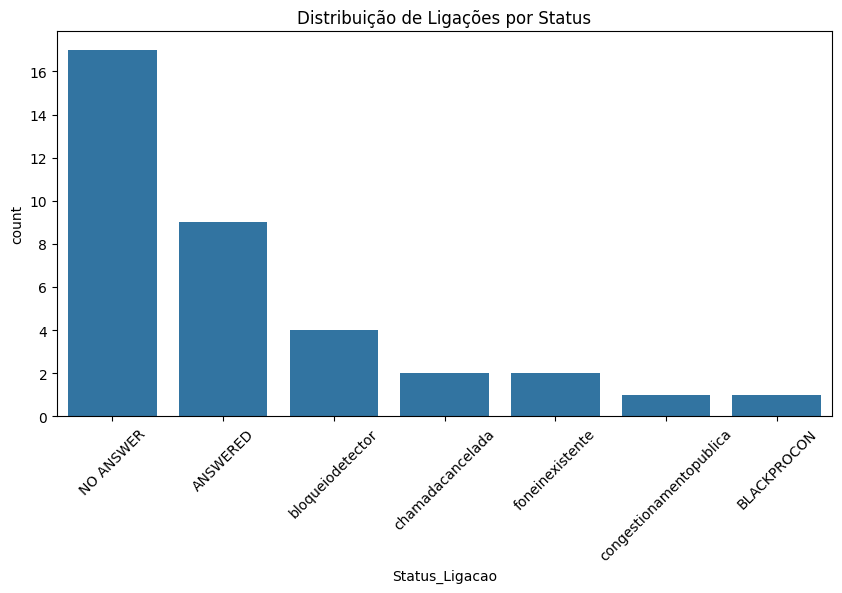

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Status_Ligacao", order=df["Status_Ligacao"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribuição de Ligações por Status")
plt.show()


## Plot de distribuição de duração das Ligações

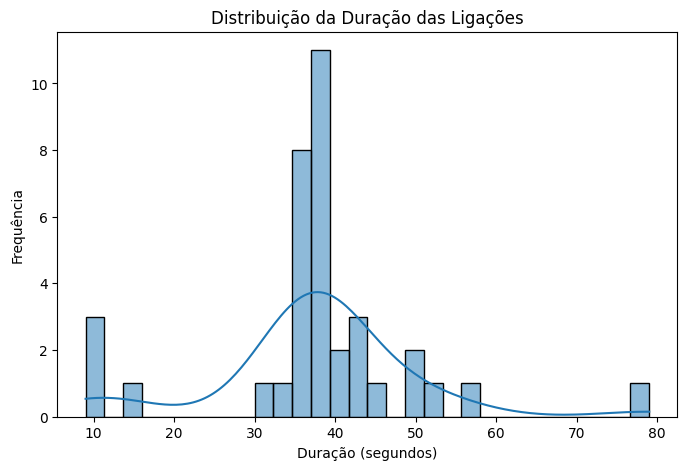

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["Duaration"].dropna(), bins=30, kde=True)
plt.title("Distribuição da Duração das Ligações")
plt.xlabel("Duração (segundos)")
plt.ylabel("Frequência")
plt.show()


## Plot da quantidade de Ligações por tipo de contato

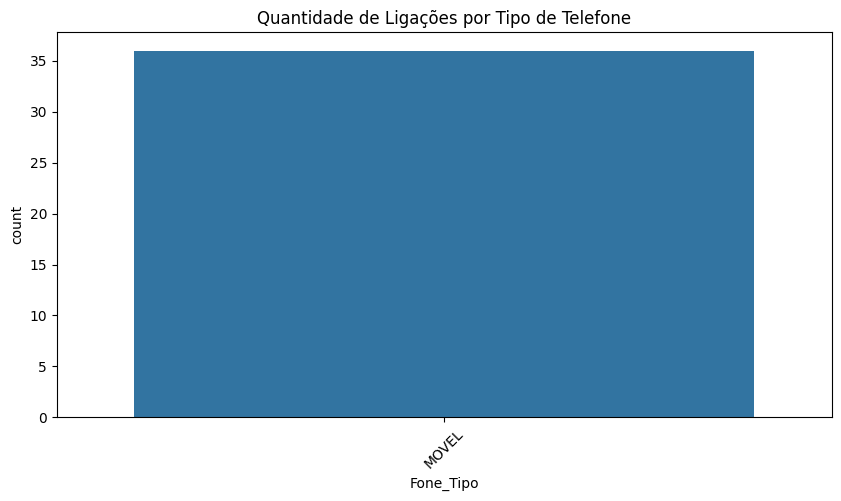

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Fone_Tipo", order=df["Fone_Tipo"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Quantidade de Ligações por Tipo de Telefone")
plt.show()


## Plot de número de ligações ao longo do tempo (em caso de intervalo de tempo)

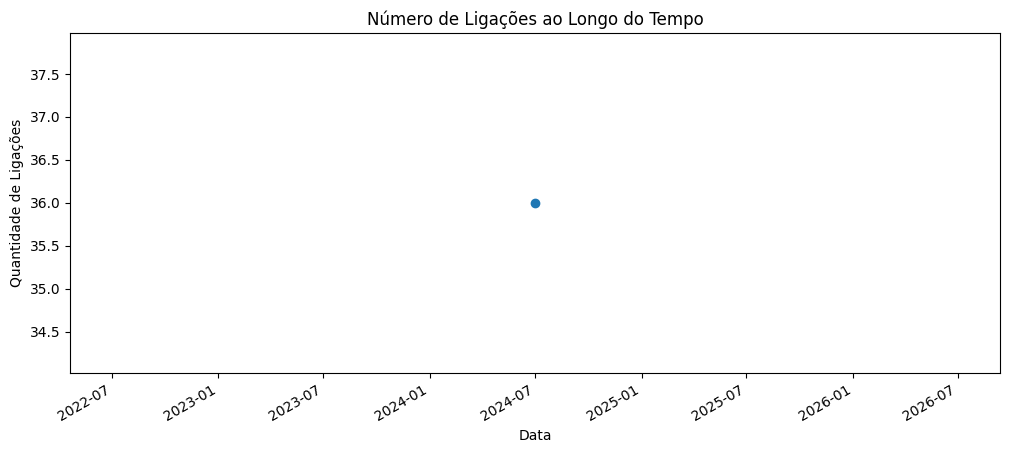

In [8]:
df["lcall"] = pd.to_datetime(df["lcall"], format="%d/%m/%Y %H:%M")
df.set_index("lcall", inplace=True)

plt.figure(figsize=(12,5))
df.resample("D").size().plot(marker='o')  # Agrupar por dia
plt.title("Número de Ligações ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ligações")
plt.show()


## Plot dos clinetes com mais ligações

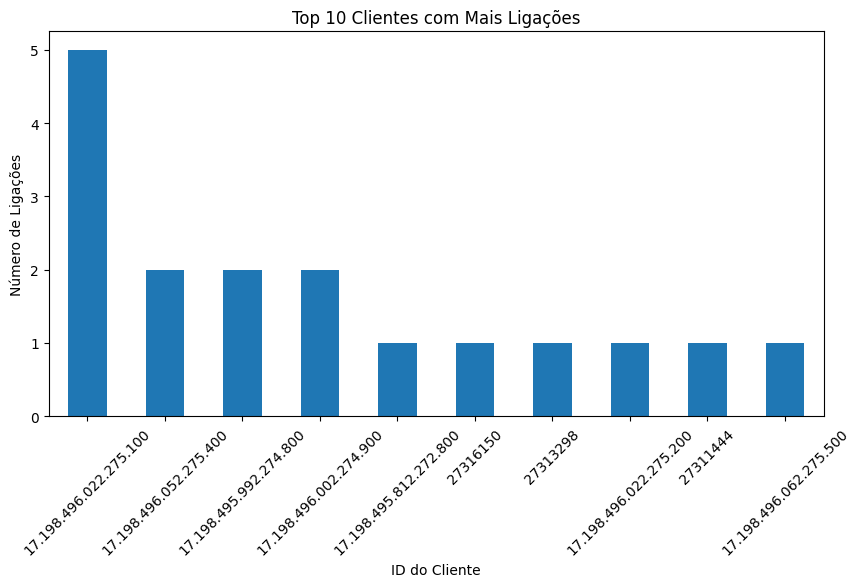

In [9]:
plt.figure(figsize=(10,5))
df["ID"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Clientes com Mais Ligações")
plt.xlabel("ID do Cliente")
plt.ylabel("Número de Ligações")
plt.xticks(rotation=45)
plt.show()


## Plot tempo médio das ligações por status

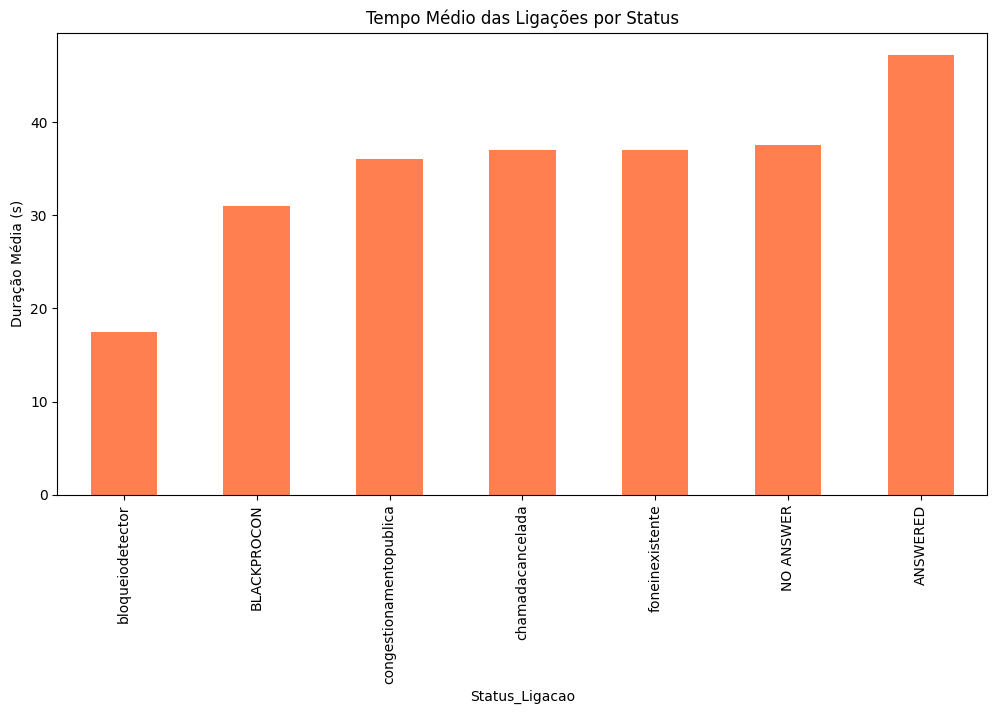

In [11]:
df.groupby("Status_Ligacao")["Duaration"].mean().sort_values().plot(kind='bar', figsize=(12,6), color='coral')
plt.title("Tempo Médio das Ligações por Status")
plt.ylabel("Duração Média (s)")
plt.show()


## Plot melhor horário para contato com cliente (subtraindo duplicidades)

<ipython-input-47-370862290e5b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Hora"], palette="coolwarm")


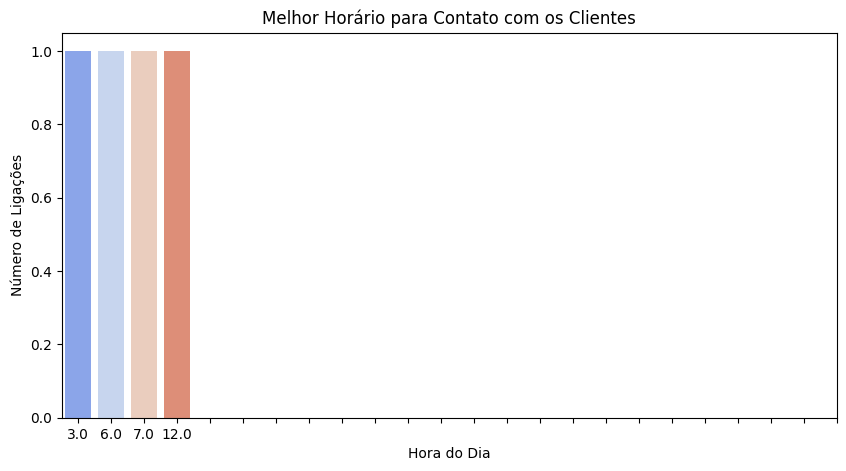

In [47]:
# Garantir que a coluna 'LastCall' esteja no formato datetime, usando .loc para evitar o SettingWithCopyWarning
df.loc[:, "LastCall"] = pd.to_datetime(df["LastCall"])

# Extrair a hora da ligação
df.loc[:, "Hora"] = df["LastCall"].dt.hour

# Resetar o índice para evitar problemas com índices duplicados
df = df.reset_index(drop=True)

# Verificar se há valores duplicados na coluna 'Hora'
df = df.drop_duplicates(subset=["Hora"])

# Plotar o gráfico
plt.figure(figsize=(10,5))
sns.countplot(x=df["Hora"], palette="coolwarm")
plt.title("Melhor Horário para Contato com os Clientes")
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Ligações")
plt.xticks(range(24))
plt.show()


## Plot clientes com maior índice de retorno

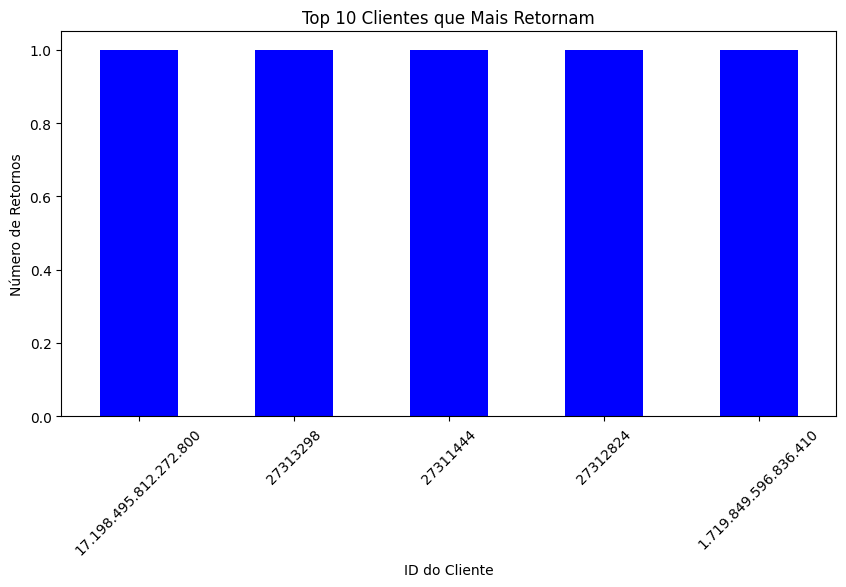

In [49]:
df["ID"].value_counts().head(10).plot(kind="bar", figsize=(10,5), color="blue")
plt.title("Top 10 Clientes que Mais Retornam")
plt.xlabel("ID do Cliente")
plt.ylabel("Número de Retornos")
plt.xticks(rotation=45)
plt.show()


## Plot efetividade dos tipos de contato (para mais de um tipo existente/usado)

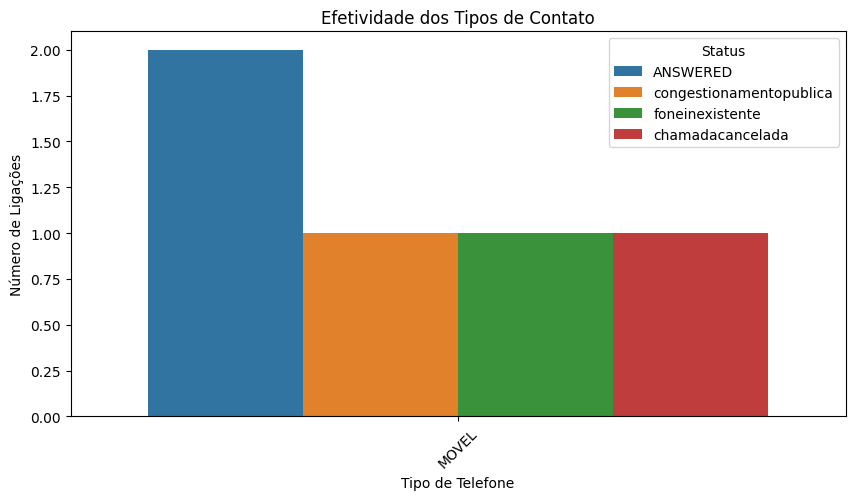

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Fone_Tipo", hue="Status_Ligacao", order=df["Fone_Tipo"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Efetividade dos Tipos de Contato")
plt.xlabel("Tipo de Telefone")
plt.ylabel("Número de Ligações")
plt.legend(title="Status")
plt.show()
